**Code Below is for Udacity Writing a Data Science Blog Post Project**

**Installation:**

Code for the project requires python 3 and the followinf librariws:
    - pandas
    - numpy
    - zipfile
    - seaborn
    - matplotlib.pyplot
    - re
    - nltk
    - wordcloud
    - folium
Most of the libraries above are included in anaconda distribution. Trough coding i've needed to pip install folium only.

## 1. Bussiness Understanding and Problem Definition##
For this project i've chosed to analyze given AirBnb data sets for Boston and Seattle.

**Motivation:**

My main motivation to select this project it has soo many aspects a data scientist can investigate
contains 2 differet citties for comparison which will made answers more rubost.
I've wanted to analyze:
    - Can wording effect perception of any host bussinesses?
    - Can location is still the first element to look at if someone decides to open a host bussiness. 

Therefore through the project i will try to answer the following questions:
    - Does wording effect reviews?
    - Location vs revenue where to invest?
    - Is finding aplicable to other data set?

**Data Sets:**

Data files provided by Udacity and Kaggle for this project which derived from AirBnb Seattle and Boston Cities data.
- seattle.zip
    - calendar.csv : Availablity of AirBnb Listings for each day of 2016 with prices.
    - listings.csv : Description of AirBnb Listings with many descriptive features.
    - reviews.csv : Reviews related to AirBnb Listing with unique reviewer ids.
- boston.zip
    - calendar.csv : Availablity of AirBnb Listings for each day of 2017 with prices.
    - listings.csv : Description of AirBnb Listings with many descriptive features.
    - reviews.csv : Reviews related to AirBnb Listing with unique reviewer ids.

**Objective and Plan :**

At the first glance data set seems well prepared and organized. It has 3 files for each city and total of 100 columns for listings. On the other hand it is clear that there are some missing values that must be handled.

My main objective at this phase is find relative and simple anwsers to question i've explained above. For this reason i've decided to investigate:
    - listing.csv for descriptive columns and their wording, also coordinate data
    - reviews.csv for reviews entered for listings and their wording
    - calendar.csv to calculate average prices and availablity to assess location based pricing affects.

So first i will investigate data sets on data undestanding phase and handle missing values and create data frames for my modelling and evaluation phases. 

**Results :**

My Results according to question i've trying to find out shortly are:
    - Does wording effect reviews : No, I couldn't find sharp relation between description and reviews.
    - Location vs revenue where to invest : Yes, it is clear that center-located listings have more nightly stay prices.
    - Is finding aplicable to other data set : Yes above 2 questions give the same results on both Seattle and Boston data sets.

More detailed results are in below blog post:
https://medium.com/@m.bilgehankilinc/an-experienced-business-developer-vs-a-lazy-traveler-on-airbnb-seattle-and-boston-data-12771267b28b

**Acknowledgement**
This dataset is part of Airbnb Inside and presented on Kaggle.com. I've used data by direction of Udacity for Write a Data Science Blog Post assignment.

## 2. Data Undestanding

For this part i've loaded data investiate in. Also created some summary stats to asses current situation.

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import zipfile as zf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Tokenization and Word Cloud
import re
import nltk
nltk.download(['wordnet', 'stopwords', 'punkt'])
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Clustering
from sklearn.cluster import KMeans
import folium

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def f_tokenize(text):
    '''
    This function takes a text column
    cleans from punctiation, tokenize it
    and remove english stop words
    then returns list constructed by tokenized text elements.
    input : a collection of test messages such as list/dataframe.
    output : a cleaned and tokenized list.
    '''
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9]', ' ', text)
    words = word_tokenize(text)
    wnlm = WordNetLemmatizer()
    words = [wnlm.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return words

In [3]:
def f_word_cloud_gen(df, cloumn_name, cloud_name):
    # finally lets try to create a word cloud
    # Libraries for tokenization function
    '''
    This function takes a tokenized df column.
    Creates and save a word cloud image to the same directory.
    
    input : a collection of test messages such as list/dataframe and file name to save.
    output : an image containing word cloud.
    '''
    text = ' '.join(word for text in df[cloumn_name].values for word in text )
    w_cloud = WordCloud(width=4800, height=3200, max_words=400, background_color = 'white')
    cloud = w_cloud.generate(text)
    cloud.to_file('{}.png'.format(cloud_name))
    
    return cloud

In [4]:
# Load data
# Seattle data
zf_1 = zf.ZipFile('seattle.zip')
df_seattle_calendar = pd.read_csv(zf_1.open('calendar.csv'), index_col='listing_id', parse_dates=['date'])
df_seattle_listings = pd.read_csv(zf_1.open('listings.csv'), index_col='id', parse_dates=['last_scraped', 'calendar_last_scraped'])
df_seattle_reviews = pd.read_csv(zf_1.open('reviews.csv'), index_col='listing_id', parse_dates=['date'])


# Boston data
zf_2 = zf.ZipFile('boston.zip')
df_boston_calendar = pd.read_csv(zf_2.open('calendar.csv'), index_col='listing_id', parse_dates=['date'])
df_boston_listings = pd.read_csv(zf_2.open('listings.csv'), index_col='id', parse_dates=['last_scraped', 'calendar_last_scraped'])
df_boston_reviews = pd.read_csv(zf_2.open('reviews.csv'), index_col='listing_id', parse_dates=['date'])


/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:395: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


**2.1. Exploratory Analysis**

General control of dataset. At this section i've tried to get a glimpse of data and find out which might be the best options to answer my questions.

In [5]:
# Calendar Csv
# Availablity of AirBnb Listings for each day of 2016 with prices.
# Below explration, decription and analyzation of emtptiness.
print(df_seattle_calendar.info(),'\n')
print(df_seattle_calendar.describe(),'\n')
print('Emptyness Percentage : ', df_seattle_calendar.isnull().sum()/df_seattle_calendar.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1393570 entries, 241032 to 10208623
Data columns (total 3 columns):
date         1393570 non-null datetime64[ns]
available    1393570 non-null object
price        934542 non-null object
dtypes: datetime64[ns](1), object(2)
memory usage: 42.5+ MB
None 

                       date available    price
count               1393570   1393570   934542
unique                  365         2      669
top     2016-12-27 00:00:00         t  $150.00
freq                   3818    934542    36646
first   2016-01-04 00:00:00       NaN      NaN
last    2017-01-02 00:00:00       NaN      NaN 

Emptyness Percentage :  date         0.00000
available    0.00000
price        0.32939
dtype: float64


In [6]:
# Listings Csv
# Description of AirBnb Listings with many descriptive features.
# Below explration, decription and analyzation of emtptiness.
print(df_seattle_listings.info(),'\n')
print(df_seattle_listings.describe(),'\n')
print('Emptyness Percentage : ', (df_seattle_listings.isnull().sum()/df_seattle_listings.shape[0]).sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 241032 to 10208623
Data columns (total 91 columns):
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null datetime64[ns]
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498 non-null object
host_id               

In [7]:
# Reviews Csv
# Reviews related to AirBnb Listing with unique reviewer ids.
# Below explration, decription and analyzation of emtptiness.
print(df_seattle_reviews.info(),'\n')
print(df_seattle_reviews.describe(),'\n')
print('Emptyness Percentage : ', (df_seattle_reviews.isnull().sum()/df_seattle_reviews.shape[0]).sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84849 entries, 7202016 to 9727246
Data columns (total 5 columns):
id               84849 non-null int64
date             84849 non-null datetime64[ns]
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.9+ MB
None 

                 id   reviewer_id
count  8.484900e+04  8.484900e+04
mean   3.058765e+07  1.701301e+07
std    1.636613e+07  1.353704e+07
min    3.721000e+03  1.500000e+01
25%    1.725127e+07  5.053141e+06
50%    3.228809e+07  1.413476e+07
75%    4.457648e+07  2.762402e+07
max    5.873651e+07  5.281274e+07 

Emptyness Percentage :  comments         0.000212
reviewer_name    0.000000
reviewer_id      0.000000
date             0.000000
id               0.000000
dtype: float64


**2.2. Some Summary Statistics**

Below i've created some summary statistics and graphs to asses Seattle Dataset more trougly.

In [8]:
print('Seattle Summary Stats')
print('Number of Unique Listings at 2016 : ', df_seattle_listings.index.nunique())
print('Average Availablity of Listings at 2016 :', round(np.mean(df_seattle_calendar.groupby(['listing_id', 'available'])['date'].count().unstack()['f'].dropna()/365), 2))
print('Average Price of Listings at 2016 :', round(np.mean(pd.to_numeric(df_seattle_calendar['price'].str.replace('$', '').str.replace(',', '')).dropna().groupby('listing_id').mean()), 2))
print('Average Review Score of Listings at 2016 : ', round(np.mean(df_seattle_listings.review_scores_value.dropna().groupby('id').mean()), 2))
print('Number of Reviews of Listings at 2016 : ', df_seattle_reviews.id.nunique())
print('Number of Unique Reviewers for Listings at 2016 : ', df_seattle_reviews.reviewer_id.nunique())

Seattle Summary Stats
Number of Unique Listings at 2016 :  3818
Average Availablity of Listings at 2016 : 0.4
Average Price of Listings at 2016 : 135.76
Average Review Score of Listings at 2016 :  9.45
Number of Reviews of Listings at 2016 :  84849
Number of Unique Reviewers for Listings at 2016 :  75730


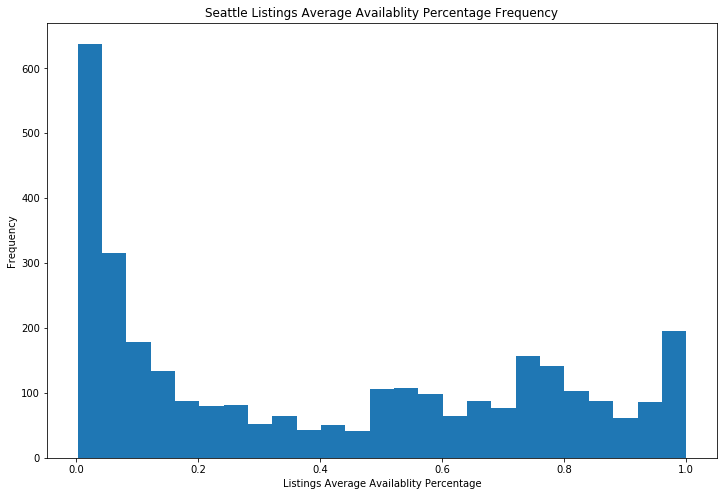

In [9]:
plt.figure(figsize=(12,8))
(df_seattle_calendar.groupby(['listing_id', 'available'])['date'].count().unstack()['f'].dropna()/365).plot(kind='hist', bins=25)
plt.title('Seattle Listings Average Availablity Percentage Frequency')
plt.xlabel('Listings Average Availablity Percentage')
plt.show()

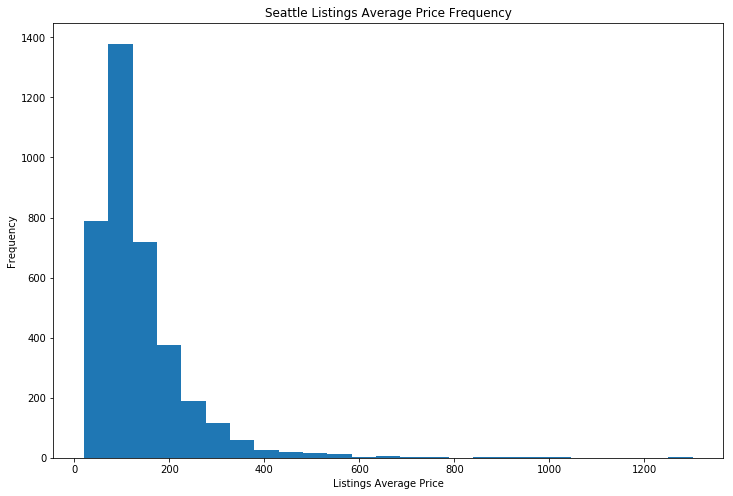

In [10]:
plt.figure(figsize=(12,8))
pd.to_numeric(df_seattle_calendar['price'].str.replace('$', '').str.replace(',', '')).dropna().groupby('listing_id').mean().plot(kind='hist', bins=25)
plt.title('Seattle Listings Average Price Frequency')
plt.xlabel('Listings Average Price')
plt.show()

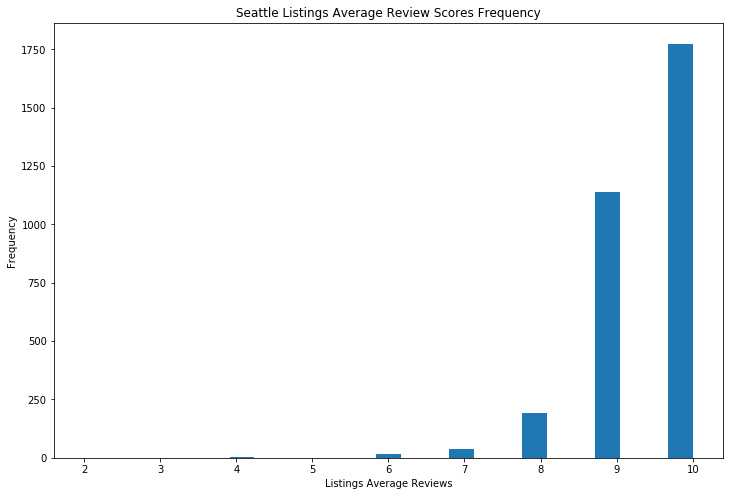

In [11]:
plt.figure(figsize=(12,8))
df_seattle_listings.review_scores_value.dropna().groupby('id').mean().plot(kind='hist', bins=25)
plt.title('Seattle Listings Average Review Scores Frequency')
plt.xlabel('Listings Average Reviews')
plt.show()

## 3. Data Preperation:

For this part i've chosen relevant columns and prepocess them for modelling and evaluation to find out answers to my questions.

**3.1. Seattle Data**

3.1.1. Creating nessarry dataframes for Question 1: Does wording effect reviews? 

In [12]:
# Making a list of descriptive columns i've decided to use.
l__listings_des_cols = ['name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit']

# Check null values.
print(df_seattle_listings[l__listings_des_cols].isnull().sum())

# Lest take all descriptive columns and concatanete them into one column as str from listings.csv.
df_seattle_listings[l__listings_des_cols] = df_seattle_listings[l__listings_des_cols].astype('str')
df_seattle_listings['all_decription'] = df_seattle_listings[l__listings_des_cols].apply(','.join, axis=1)

# Create a new df for all descriptions and all reviews
# Check null values.
print(df_seattle_reviews['comments'].isnull().sum())

# First assignt str type to comments collumn.
df_seattle_reviews['comments'] = df_seattle_reviews['comments'].astype('str')

# Join reviews and comments on id. This required to concatanate comments of id's into one rows.
df_seattle_desc_vs_rew = df_seattle_listings['all_decription'].to_frame().join(df_seattle_reviews.groupby('listing_id')['comments'].agg(','.join))

# Assign new column names.
df_seattle_desc_vs_rew.columns = ('all_description', 'all_reviews')

# Check null values.
print(df_seattle_desc_vs_rew.isnull().sum())

# Drop null values since there was not too much and remaining data still usable.
df_seattle_desc_vs_rew = df_seattle_desc_vs_rew.dropna()

# Check the shape to see total listings number is still good to go.
print(df_seattle_desc_vs_rew.shape)

# Tokenize descriptions and reviews for further investigations.
df_seattle_desc_vs_rew['tokenized_descs'] = df_seattle_desc_vs_rew['all_description'].astype('str').apply(f_tokenize)
df_seattle_desc_vs_rew['tokenized_revs'] = df_seattle_desc_vs_rew['all_reviews'].astype('str').apply(f_tokenize)

# Create intersection and differance of words
df_seattle_desc_vs_rew['words_intersection']  = str(None)
df_seattle_desc_vs_rew['words_difference']  = str(None)

for index in df_seattle_desc_vs_rew.index:
    df_seattle_desc_vs_rew.loc[index]['words_intersection'] = list(set(df_seattle_desc_vs_rew.loc[index]['tokenized_revs']).intersection(set(df_seattle_desc_vs_rew.loc[index]['tokenized_descs'])))
    df_seattle_desc_vs_rew.loc[index]['words_difference'] = list(set(df_seattle_desc_vs_rew.loc[index]['tokenized_revs']).difference(set(df_seattle_desc_vs_rew.loc[index]['tokenized_descs'])))

df_seattle_desc_vs_rew.head()

name                        0
summary                   177
space                     569
description                 0
experiences_offered         0
neighborhood_overview    1032
notes                    1606
transit                   934
dtype: int64
18
all_description      0
all_reviews        627
dtype: int64
(3191, 2)


,all_description,all_reviews,tokenized_descs,tokenized_revs,words_intersection,words_difference
id,,,,,,
241032,"Stylish Queen Anne Apartment,nan,Make your sel...",Excellent all the way around. \r\n\r\nMaija wa...,"[stylish, queen, anne, apartment, nan, make, s...","[excellent, way, around, maija, excellent, hos...","[bed, queen, plan, coffee, complete, bbq, ball...","[comfy, wife, us, fyi, ron, sch, issue, neares..."
953595,"Bright & Airy Queen Anne Apartment,Chemically ...",The reservation was canceled 33 days before ar...,"[bright, airy, queen, anne, apartment, chemica...","[reservation, canceled, 33, day, arrival, auto...","[let, queen, coffee, street, well, owner, stop...","[comfy, plentiful, everything, malena, include..."
3308979,"New Modern House-Amazing water view,New modern...",Our stay at the New Modern House was amazing! ...,"[new, modern, house, amazing, water, view, new...","[stay, new, modern, house, amazing, great, vie...","[bed, perfect, love, needed, queen, tub, 4, jo...","[brought, exceptional, really, fourth, viking,..."
278830,"Charming craftsman 3 bdm house,Cozy family cra...","We had a great time staying here, very conveni...","[charming, craftsman, 3, bdm, house, cozy, fam...","[great, time, staying, conveniently, located, ...","[bed, queen, perfect, distance, street, ballar...","[comfy, everything, issue, addressing, oliver,..."
5956968,"Private unit in a 1920s mansion,We're renting ...",A very nice 1 bedroom located above a garage i...,"[private, unit, 1920s, mansion, renting, small...","[nice, 1, bedroom, located, garage, nice, hous...","[bed, antique, queen, part, street, small, 1, ...","[bux, really, went, message, dining, everythin..."


3.1.2. Creating nessarry dataframes for Question 2: Location vs revenue where to invest?

In [13]:
# Calculating Mean Price From Calendar
# First clean and make numeric price column since it has different formatting.
df_seattle_calendar['price_cleaned'] = pd.to_numeric(df_seattle_calendar['price'].str.replace('$', '').str.replace(',', ''))

# Create df for mean prices for all listings at calendar.csv.
df_seattle_listings_mean_price = df_seattle_calendar.groupby('listing_id')['price_cleaned'].mean().round(2)

# To make more robust estimations i've decided to remove outliers.
# For this purpose i've chosen %95 confidence interval for the values.
df_seattle_listings_mean_price = df_seattle_listings_mean_price[(df_seattle_listings_mean_price.quantile(0.025)<=df_seattle_listings_mean_price)&
                                                                (df_seattle_listings_mean_price<= df_seattle_listings_mean_price.quantile(0.975))]

# To analyze location vs revenue for our listings i've decided to use clustering.For this purpose i've created a new data frame for clustering.
# First i've chosen 'is_location_exact'== True 
df_to_cluster = df_seattle_listings[df_seattle_listings['is_location_exact'] == 't'] [['latitude', 'longitude']]

# Append average prices as a new column.
df_to_cluster['mean_price'] = df_seattle_listings_mean_price

# Check null values.
print(df_to_cluster.isnull().sum())

# Dropping null values since there are a small percent of missing values there are.
df_to_cluster = df_to_cluster.dropna()

# Check the shape to see total listings number is still good to go.
print(df_to_cluster.shape)

df_to_cluster.head()

latitude        0
longitude       0
mean_price    248
dtype: int64
(3164, 3)


,latitude,longitude,mean_price
id,,,
241032,47.636289,-122.371025,85.00
953595,47.639123,-122.365666,170.93
7421966,47.638473,-122.369279,100.00
5956968,47.630525,-122.366174,125.63
1909058,47.636605,-122.368519,80.00


**3.2. Boston Data**

3.2.1. Creating nessarry dataframes for Question 1: Does wording effect reviews? 

In [14]:
# Making a list of descriptive columns i've decided to use.
l__listings_des_cols = ['name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit']

# Check null values.
print(df_boston_listings[l__listings_des_cols].isnull().sum())

# Lest take all descriptive columns and concatanete them into one column as str from listings.csv.
df_boston_listings[l__listings_des_cols] = df_boston_listings[l__listings_des_cols].astype('str')
df_boston_listings['all_decription'] = df_boston_listings[l__listings_des_cols].apply(','.join, axis=1)

# Create a new df for all descriptions and all reviews
# Check null values.
print(df_boston_reviews['comments'].isnull().sum())

# First assignt str type to comments collumn.
df_boston_reviews['comments'] = df_boston_reviews['comments'].astype('str')

# Join reviews and comments on id. This required to concatanate comments of id's into one rows.
df_boston_desc_vs_rew = df_boston_listings['all_decription'].to_frame().join(df_boston_reviews.groupby('listing_id')['comments'].agg(','.join))

# Assign new column names.
df_boston_desc_vs_rew.columns = ('all_description', 'all_reviews')

# Check null values.
print(df_boston_desc_vs_rew.isnull().sum())

# Drop null values since there was not too much and remaining data still usable.
df_boston_desc_vs_rew = df_boston_desc_vs_rew.dropna()

# Check the shape to see total listings number is still good to go.
print(df_boston_desc_vs_rew.shape)

# Tokenize descriptions and reviews for further investigations.
df_boston_desc_vs_rew['tokenized_descs'] = df_boston_desc_vs_rew['all_description'].astype('str').apply(f_tokenize)
df_boston_desc_vs_rew['tokenized_revs'] = df_boston_desc_vs_rew['all_reviews'].astype('str').apply(f_tokenize)

# Create intersection and differance of words
df_boston_desc_vs_rew['words_intersection']  = str(None)
df_boston_desc_vs_rew['words_difference']  = str(None)

for index in df_boston_desc_vs_rew.index:
    df_boston_desc_vs_rew.loc[index]['words_intersection'] = list(set(df_boston_desc_vs_rew.loc[index]['tokenized_revs']).intersection(set(df_boston_desc_vs_rew.loc[index]['tokenized_descs'])))
    df_boston_desc_vs_rew.loc[index]['words_difference'] = list(set(df_boston_desc_vs_rew.loc[index]['tokenized_revs']).difference(set(df_boston_desc_vs_rew.loc[index]['tokenized_descs'])))

df_boston_desc_vs_rew.head()

name                        0
summary                   143
space                    1057
description                 0
experiences_offered         0
neighborhood_overview    1415
notes                    1975
transit                  1290
dtype: int64
53
all_description      0
all_reviews        756
dtype: int64
(2829, 2)


,all_description,all_reviews,tokenized_descs,tokenized_revs,words_intersection,words_difference
id,,,,,,
3075044,"Charming room in pet friendly apt,Charming and...",Andrea is a great host. Neighborhood is wonder...,"[charming, room, pet, friendly, apt, charming,...","[andrea, great, host, neighborhood, wonderful,...","[bed, street, small, well, stop, using, cozy, ...","[guy, everything, puppy, sch, issue, nearest, ..."
6976,"Mexican Folk Art Haven in Boston,Come stay wit...","A Wonderful, pleasant, and charming host. The...","[mexican, folk, art, boston, come, stay, frien...","[wonderful, pleasant, charming, host, bed, com...","[sport, nearby, needham, price, restaurant, pa...","[wife, everything, included, bath, wrong, era,..."
1436513,"Spacious Sunny Bedroom Suite in Historic Home,...","Meghna was very kind, welcoming, and approacha...","[spacious, sunny, bedroom, suite, historic, ho...","[meghna, kind, welcoming, approachable, home, ...","[though, home]","[visit, beautiful, time, meghna, approachable,..."
7651065,"Come Home to Boston,My comfy, clean and relaxi...","We stayed for two nights last week, and we had...","[come, home, boston, comfy, clean, relaxing, h...","[stayed, two, night, last, week, absolutely, l...","[roommate, bed, comfy, really, street, phone, ...","[everything, toutes, minded, b, charlie, insta..."
12386020,"Private Bedroom + Great Coffee,Super comfy bed...",We had an amazing stay at Deb's place. She has...,"[private, bedroom, great, coffee, super, comfy...","[amazing, stay, deb, place, done, nice, interi...","[coffee, comfy, love, street, ride, downtown, ...","[est, really, went, leaving, everything, priva..."


3.2.2. Creating nessarry dataframes for Question 2: Location vs revenue where to invest?

In [15]:
# Calculating Mean Price From Calendar
# First clean and make numeric price column since it has different formatting.
df_boston_calendar['price_cleaned'] = pd.to_numeric(df_boston_calendar['price'].str.replace('$', '').str.replace(',', ''))

# Create df for mean prices for all listings at calendar.csv.
df_boston_listings_mean_price = df_boston_calendar.groupby('listing_id')['price_cleaned'].mean().round(2)

# To make more robust estimations i've decided to remove outliers.
# For this purpose i've chosen %95 confidence interval for the values.
df_boston_listings_mean_price = df_boston_listings_mean_price[(df_boston_listings_mean_price.quantile(0.025)<=df_boston_listings_mean_price)&
                                                                (df_boston_listings_mean_price<= df_boston_listings_mean_price.quantile(0.975))]

# To analyze location vs revenue for our listings i've decided to use clustering.For this purpose i've created a new data frame for clustering.
# First i've chosen 'is_location_exact'== True 
df_to_cluster_b = df_boston_listings[df_boston_listings['is_location_exact'] == 't'] [['latitude', 'longitude']]

# Append average prices as a new column.
df_to_cluster_b['mean_price'] = df_boston_listings_mean_price

# Check null values.
print(df_to_cluster_b.isnull().sum())

# Dropping null values since there are a small percent of missing values there are.
df_to_cluster_b = df_to_cluster_b.dropna()

# Check the shape to see total listings number is still good to go.
print(df_to_cluster_b.shape)

df_to_cluster_b.head()

latitude        0
longitude       0
mean_price    726
dtype: int64
(2354, 3)


,latitude,longitude,mean_price
id,,,
3075044,42.286241,-71.134374,67.81
6976,42.292438,-71.135765,65.00
7651065,42.284512,-71.136258,79.00
12386020,42.291690,-71.131893,75.00
2843445,42.281946,-71.141022,75.00


## 4. Modelling and Evaluation

**4.1. Does Wording Of Descriptions Affect Reviews of Seattle Travellers?**

In [16]:
# Creating word clouds for 4 columns and saving it for Seattle Data.
words_description_cloud = f_word_cloud_gen(df_seattle_desc_vs_rew, 'tokenized_descs', 'words_description_cloud')
words_review_cloud = f_word_cloud_gen(df_seattle_desc_vs_rew, 'tokenized_revs', 'words_review_cloud')

words_intersection_cloud = f_word_cloud_gen(df_seattle_desc_vs_rew, 'words_intersection', 'words_intersection_cloud')
words_difference_cloud = f_word_cloud_gen(df_seattle_desc_vs_rew, 'words_difference', 'words_difference_cloud')

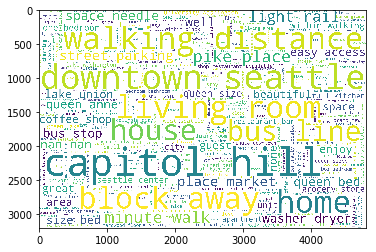

In [17]:
wdc = plt.imread('words_description_cloud.png')
plt.imshow(wdc)

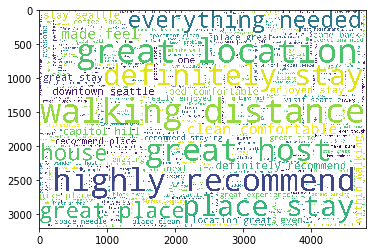

In [20]:
wrc = plt.imread('words_review_cloud.png')
plt.imshow(wrc)

**4.2. Does Location Based Clustering Makes Sense for Lazy Data Enthusiast?**

loc_clusters
0    136.622787
1    118.123508
2    144.732163
3    110.551557
4     98.512008
5    124.136870
Name: mean_price, dtype: float64


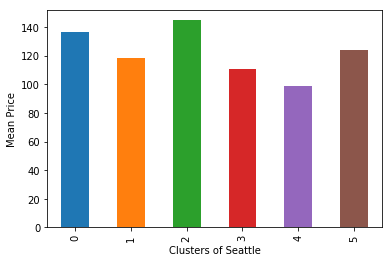

In [21]:
# Fitting and making predictions for Seattle Data.
kmeans_loc = KMeans(n_clusters=6)
df_to_cluster['loc_clusters'] = kmeans_loc.fit_predict(df_to_cluster[['latitude', 'longitude']])

print(df_to_cluster.groupby('loc_clusters')['mean_price'].mean())
df_to_cluster.groupby('loc_clusters')['mean_price'].mean().plot(kind='bar')
plt.xlabel('Clusters of Seattle')
plt.ylabel('Mean Price')
plt.show()

# Mapping
map_seattle = folium.Map()
d_colors = {0:'blue', 1:'orange', 2:'green', 3:'red', 4:'purple', 5:'brown'}
d_mean_prices = {0:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[0],
                 1:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[1],
                 2:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[2],
                 3:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[3],
                 4:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[4],
                 5:df_to_cluster.groupby('loc_clusters')['mean_price'].mean()[5]}

# Map of 1000 listings sample.
df_to_cluster.sample(1000).apply(lambda row: folium.CircleMarker(location=[row["latitude"], row["longitude"]],
                                                                color=d_colors[row['loc_clusters']], 
                                                                popup=d_mean_prices[row['loc_clusters']]).add_to(map_seattle) ,axis=1)

map_seattle.save('map_seattle.html')

map_seattle

**4.3. Does These Result Can Be Aplicable to Boston?**

4.3.1. Wording Effects?

In [22]:
# Creating word clouds for 4 columns and saving it.
words_description_cloud_b = f_word_cloud_gen(df_boston_desc_vs_rew, 'tokenized_descs', 'words_description_cloud_b')
words_review_cloud_b = f_word_cloud_gen(df_boston_desc_vs_rew, 'tokenized_revs', 'words_review_cloud_b')

words_intersection_cloud_b = f_word_cloud_gen(df_boston_desc_vs_rew, 'words_intersection', 'words_intersection_cloud_b')
words_difference_cloud_b = f_word_cloud_gen(df_boston_desc_vs_rew, 'words_difference', 'words_difference_cloud_b')

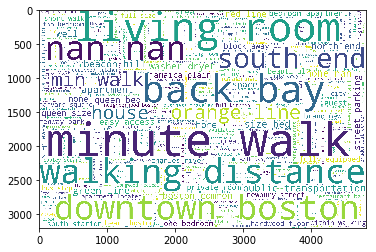

In [36]:
wdc_b = plt.imread('words_description_cloud_b.png')
plt.imshow(wdc_b)

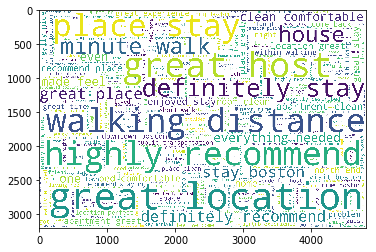

In [37]:
wrc_b = plt.imread('words_review_cloud_b.png')
plt.imshow(wrc_b)

4.3.2. Location Based Clustering?

loc_clusters
0    154.605932
1    226.553440
2    126.315381
3    110.652468
4    102.965370
5    237.292443
Name: mean_price, dtype: float64


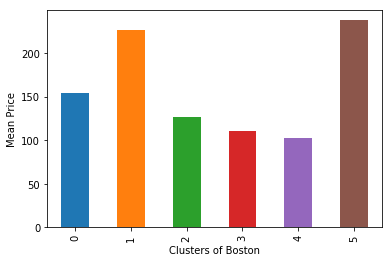

In [25]:
# Fitting and making predictions for Boston Data.
kmeans_loc = KMeans(n_clusters=6)
df_to_cluster_b['loc_clusters'] = kmeans_loc.fit_predict(df_to_cluster_b[['latitude', 'longitude']])

print(df_to_cluster_b.groupby('loc_clusters')['mean_price'].mean())
df_to_cluster_b.groupby('loc_clusters')['mean_price'].mean().plot(kind='bar')
plt.xlabel('Clusters of Boston')
plt.ylabel('Mean Price')
plt.show()

# Mapping
map_boston = folium.Map()
d_colors = {0:'blue', 1:'orange', 2:'green', 3:'red', 4:'purple', 5:'brown'}
d_mean_prices_b = {0:df_to_cluster_b.groupby('loc_clusters')['mean_price'].mean()[0],
                 1:df_to_cluster_b.groupby('loc_clusters')['mean_price'].mean()[1],
                 2:df_to_cluster_b.groupby('loc_clusters')['mean_price'].mean()[2],
                 3:df_to_cluster_b.groupby('loc_clusters')['mean_price'].mean()[3],
                 4:df_to_cluster_b.groupby('loc_clusters')['mean_price'].mean()[4],
                 5:df_to_cluster_b.groupby('loc_clusters')['mean_price'].mean()[5]}

# Map of 1000 listings sample.
df_to_cluster_b.sample(1000).apply(lambda row: folium.CircleMarker(location=[row["latitude"], row["longitude"]],
                                                                color=d_colors[row['loc_clusters']], 
                                                                popup=d_mean_prices_b[row['loc_clusters']]).add_to(map_boston) ,axis=1)

map_boston.save('map_boston.html')

map_boston

4.4. Printing Some Results.

In [26]:
df_words_description_freq_seattle = pd.DataFrame.from_dict(words_description_cloud.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_words_review_freq_seattle = pd.DataFrame.from_dict(words_review_cloud.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_words_intersection_freq_seattle = pd.DataFrame.from_dict(words_intersection_cloud.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_words_difference_freq_seattle = pd.DataFrame.from_dict(words_difference_cloud.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)

In [27]:
df_words_description_freq_seattle.head(5)

,frequency
capitol hill,1.000000
downtown seattle,0.992340
living room,0.834929
walking distance,0.834163
home,0.833014


In [28]:
df_words_review_freq_seattle.head(5)

,frequency
walking distance,1.000000
great location,0.985349
highly recommend,0.872594
great host,0.852054
definitely stay,0.803792


In [29]:
df_words_intersection_freq_seattle.head(5)

,frequency
block neighborhood,1.000000
comfortable bus,0.673981
house quiet,0.537618
downtown walk,0.512539
new seattle,0.498433


In [30]:
df_words_difference_freq_seattle.head(5)

,frequency
staying thanks,1.000000
even listing,0.721397
really part,0.700437
awesome back,0.627948
sure better,0.627074


In [31]:
df_words_description_freq_b = pd.DataFrame.from_dict(words_description_cloud_b.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_words_review_freq_b = pd.DataFrame.from_dict(words_review_cloud_b.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_words_intersection_freq_b = pd.DataFrame.from_dict(words_intersection_cloud_b.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
df_words_difference_freq_b = pd.DataFrame.from_dict(words_difference_cloud_b.words_, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)

In [32]:
df_words_description_freq_b.head(5)

,frequency
minute walk,1.000000
living room,0.749558
back bay,0.671847
walking distance,0.595196
downtown boston,0.592017


In [33]:
df_words_review_freq_b.head(5)

,frequency
great location,1.000000
great host,0.864957
walking distance,0.779677
highly recommend,0.771320
place stay,0.684330


In [34]:
df_words_intersection_freq_b.head(5)

,frequency
boston place,1.000000
floor walk,0.938865
walk boston,0.917031
boston day,0.877729
downtown walk,0.864629


In [35]:
df_words_difference_freq_b.head(5)

,frequency
staying thanks,1.000000
even listing,0.727169
really part,0.695205
sure better,0.625571
easy helpful,0.589041


## 5. Results :

My Results according to question i've trying to find out shortly are:

- Does wording effect reviews : No, I couldn't find sharp relation between description and reviews.
- Location vs revenue where to invest : Yes, it is clear that center-located listings have more nightly stay prices.
- Is finding aplicable to other data set : Yes above 2 questions give the same results on both Seattle and Boston data sets.

More detailed results are in below blog post: https://medium.com/@m.bilgehankilinc/an-experienced-business-developer-vs-a-lazy-traveler-on-airbnb-seattle-and-boston-data-12771267b28b